## Seminário de Mecânica Quântica Aplicada

Victor Porto

Agosto/2022

In [1]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import hermite
from scipy.integrate import quad, dblquad
from IPython.display import display, Latex

### Partícula em uma caixa de potencial

In [2]:
m = 1
hbar = 1
L = 1
    
def psi_BOX_1D(x, n, L = L):
    return np.sqrt(2/L)*np.sin(n*np.pi/L*x)

def E_BOX_1D(n, L = L):
    return np.pi**2*hbar**2/2/m/L**2*n**2

def psi_BOX_1D_module_squared(x, n, L = L):
    return np.abs(psi_BOX_1D(x, n, L))**2

Lx = 1
Ly = 1

def psi_BOX_2D(x, y, nx, ny, Lx = Lx, Ly = Ly):
    return psi_BOX_1D(x, nx, Lx)*psi_BOX_1D(y, ny, Ly)
    
def E_BOX_2D(nx, ny, Lx = Lx, Ly = Ly):
    return E_BOX_1D(nx, Lx) + E_BOX_1D(ny, Ly)

def psi_BOX_2D_module_squared(x, y, nx, ny, Lx = Lx, Ly = Ly):
    return np.abs(psi_BOX_2D(x, y, nx, ny, Lx, Ly))**2

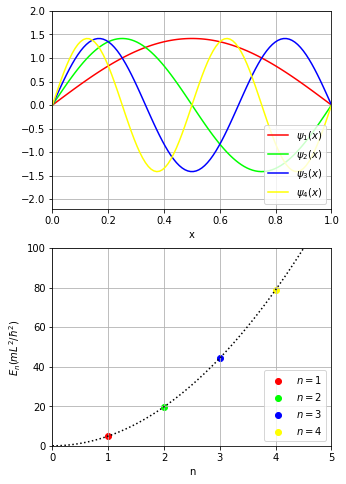

In [3]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (5,8))
               
x = np.linspace(0, 1, 100)
axs[0].plot(x,psi_BOX_1D(x,1), color = 'r', label = '$\psi_1(x)$')
axs[0].plot(x,psi_BOX_1D(x,2), color = 'lime', label = '$\psi_2(x)$')
axs[0].plot(x,psi_BOX_1D(x,3), color = 'b', label = '$\psi_3(x)$')
axs[0].plot(x,psi_BOX_1D(x,4), color = 'yellow', label = '$\psi_4(x)$')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-2.2, 2.)
axs[0].grid(True)
axs[0].set_xlabel('x')
axs[0].legend(loc = 'lower right')

n = np.linspace(0, 5, 100)
axs[1].plot(n, E_BOX_1D(n), ':k')
axs[1].scatter(1, E_BOX_1D(1), color = 'r', label = '$n = 1$')
axs[1].scatter(2, E_BOX_1D(2), color = 'lime', label = '$n = 2$')
axs[1].scatter(3, E_BOX_1D(3), color = 'b', label = '$n = 3$')
axs[1].scatter(4, E_BOX_1D(4), color = 'yellow', label = '$n = 4$')
axs[1].set_xlim(0, 5)
axs[1].set_ylim(0, 100)
axs[1].grid(True)
axs[1].set_xlabel('n')
axs[1].set_ylabel('$E_n(mL^2/\hbar^2)$')
axs[1].legend(loc = 'lower right')

plt.savefig('BOX_1D.png')

In [4]:
print('checando que as funções de onda estão normalizadas...')
display(Latex('$\int_0^L |\psi_1(x)|^2 dx =$ {}'.format(quad(psi_BOX_1D_module_squared, 0, L, args = (1))[0])))
display(Latex('$\int_0^L |\psi_2(x)|^2 dx =$ {}'.format(quad(psi_BOX_1D_module_squared, 0, L, args = (2))[0])))
display(Latex('$\int_0^L |\psi_3(x)|^2 dx =$ {}'.format(quad(psi_BOX_1D_module_squared, 0, L, args = (3))[0])))
display(Latex('$\int_0^L |\psi_4(x)|^2 dx =$ {}'.format(quad(psi_BOX_1D_module_squared, 0, L, args = (4))[0])))

checando que as funções de onda estão normalizadas...


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

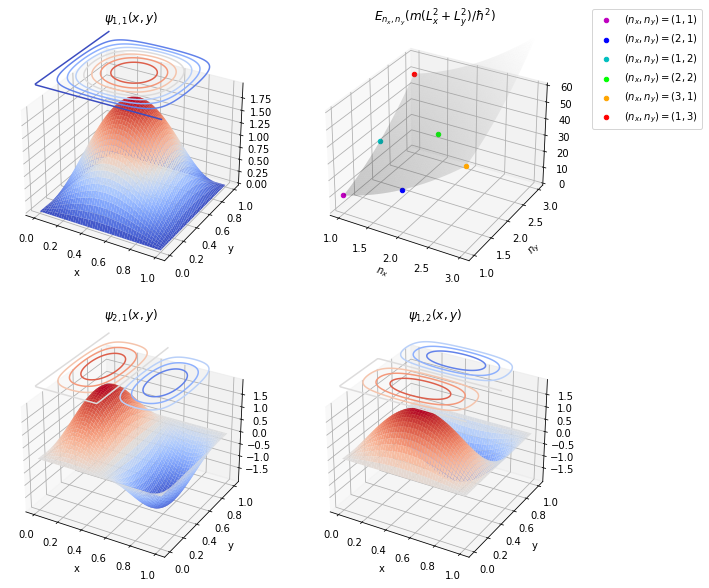

In [5]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), subplot_kw = {"projection": "3d"})

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = psi_BOX_2D(X, Y, 1, 1)
axs[0,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[0,0].contour(X, Y, Z, zdir = 'z', offset = 2.5, cmap = plt.cm.coolwarm)
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,0].set_title('$\psi_{1,1}(x,y)$')

nx = np.linspace(1, 3, 1000)
ny = np.linspace(1, 3, 1000)
nX, nY = np.meshgrid(nx, ny)
E = E_BOX_2D(nX, nY)
axs[0,1].plot_surface(nX, nY, E, cmap = cm.gray, alpha = 0.2)
axs[0,1].scatter(1, 1, E_BOX_2D(1, 1), color = 'm', label = '$(n_x,n_y) = (1,1)$')
axs[0,1].scatter(2, 1, E_BOX_2D(2, 1), color = 'b', label = '$(n_x,n_y) = (2,1)$')
axs[0,1].scatter(1, 2, E_BOX_2D(1, 2), color = 'c', label = '$(n_x,n_y) = (1,2)$')
axs[0,1].scatter(2, 2, E_BOX_2D(2, 2), color = 'lime', label = '$(n_x,n_y) = (2,2)$')
axs[0,1].scatter(3, 1, E_BOX_2D(3, 1), color = 'orange', label = '$(n_x,n_y) = (3,1)$')
axs[0,1].scatter(1, 3, E_BOX_2D(1, 3), color = 'r', label = '$(n_x,n_y) = (1,3)$')
axs[0,1].legend(bbox_to_anchor = (1.6, 1.1))
axs[0,1].set_zlim(0, 60)
axs[0,1].set_xlabel('$n_x$')
axs[0,1].set_ylabel('$n_y$')
axs[0,1].set_title('$E_{n_x,n_y}(m(L_x^2+L_y^2)/\hbar^2)$')

X, Y = np.meshgrid(x, y)
Z = psi_BOX_2D(X, Y, 2, 1)
axs[1,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,0].contour(X, Y, Z, zdir = 'z', offset = 2.8, cmap = plt.cm.coolwarm)
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')
axs[1,0].set_title('$\psi_{2,1}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_BOX_2D(X, Y, 1, 2)
axs[1,1].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,1].contour(X, Y, Z, zdir = 'z', offset = 2.8, cmap = plt.cm.coolwarm)
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('y')
axs[1,1].set_title('$\psi_{1,2}(x,y)$')

plt.savefig('BOX_2D.png', bbox_inches = 'tight')

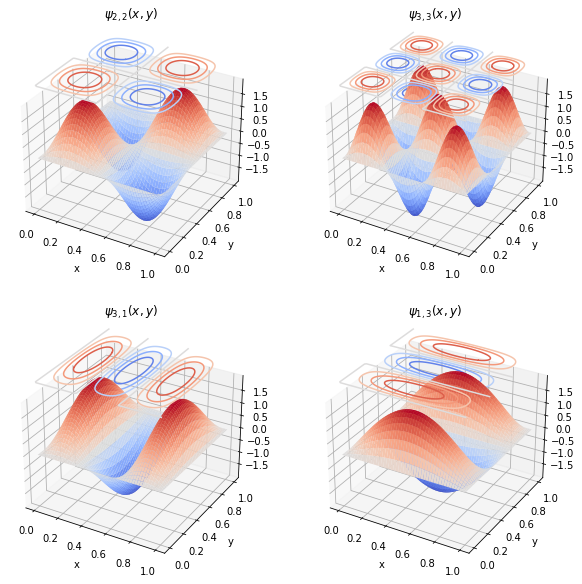

In [6]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), subplot_kw = {"projection": "3d"})

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = psi_BOX_2D(X, Y, 2, 2)
axs[0,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[0,0].contour(X, Y, Z, zdir = 'z', offset = 2.8, cmap = plt.cm.coolwarm)
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,0].set_title('$\psi_{2,2}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_BOX_2D(X, Y, 3, 3)
axs[0,1].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[0,1].contour(X, Y, Z, zdir = 'z', offset = 2.8, cmap = plt.cm.coolwarm)
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('y')
axs[0,1].set_title('$\psi_{3,3}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_BOX_2D(X, Y, 3, 1)
axs[1,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,0].contour(X, Y, Z, zdir = 'z', offset = 2.8, cmap = plt.cm.coolwarm)
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')
axs[1,0].set_title('$\psi_{3,1}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_BOX_2D(X, Y, 1, 3)
axs[1,1].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,1].contour(X, Y, Z, zdir = 'z', offset = 2.8, cmap = plt.cm.coolwarm)
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('y')
axs[1,1].set_title('$\psi_{1,3}(x,y)$')

plt.savefig('BOX_2Db.png', bbox_inches = 'tight')

In [7]:
print('checando que as funções de onda estão normalizadas...\n')
display(Latex('$\int_0^{L_y} \int_0^{L_x} |\psi_{1,1}(x,y)|^2 dx dy =$'), dblquad(psi_BOX_2D_module_squared, 0, Lx, 0, Ly, args = (1,1))[0])
print()
display(Latex('$\int_0^{L_y} \int_0^{L_x} |\psi_{2,1}(x,y)|^2 dx dy =$'), dblquad(psi_BOX_2D_module_squared, 0, Lx, 0, Ly, args = (2,1))[0])
print()
display(Latex('$\int_0^{L_y} \int_0^{L_x} |\psi_{1,2}(x,y)|^2 dx dy =$'), dblquad(psi_BOX_2D_module_squared, 0, Lx, 0, Ly, args = (1,2))[0])
print()
display(Latex('$\int_0^{L_y} \int_0^{L_x} |\psi_{2,2}(x,y)|^2 dx dy =$'), dblquad(psi_BOX_2D_module_squared, 0, Lx, 0, Ly, args = (2,2))[0])
print()
display(Latex('$\int_0^{L_y} \int_0^{L_x} |\psi_{3,1}(x,y)|^2 dx dy =$'), dblquad(psi_BOX_2D_module_squared, 0, Lx, 0, Ly, args = (3,1))[0])
print()
display(Latex('$\int_0^{L_y} \int_0^{L_x} |\psi_{1,3}(x,y)|^2 dx dy =$'), dblquad(psi_BOX_2D_module_squared, 0, Lx, 0, Ly, args = (1,3))[0])
print()
display(Latex('$\int_0^{L_y} \int_0^{L_x} |\psi_{3,3}(x,y)|^2 dx dy =$'), dblquad(psi_BOX_2D_module_squared, 0, Lx, 0, Ly, args = (3,3))[0])

checando que as funções de onda estão normalizadas...



<IPython.core.display.Latex object>

1.0

<IPython.core.display.Latex object>

1.0

<IPython.core.display.Latex object>

1.0000000000000002

<IPython.core.display.Latex object>

1.0000000000000002

<IPython.core.display.Latex object>

1.0000000000000004

<IPython.core.display.Latex object>

1.0000000000000004

<IPython.core.display.Latex object>

1.0000000000000004

### Oscilador Harmônico Quântico (QHO)

In [8]:
m = 1
omega = 1
hbar = 1
    
def psi_QHO_1D(x, n):
    return (m*omega/np.pi/hbar)**(1/4)*1/np.sqrt(2**n*factorial(n))* \
            hermite(n)(np.sqrt(m*omega/hbar)*x)*np.exp(-m*omega/2/hbar*x**2)

def E_QHO_1D(n):
    return hbar*omega*(n + 1/2)

def psi_QHO_1D_module_squared(x, n):
    return np.abs(psi_QHO_1D(x, n))**2

def psi_QHO_2D(x, y, nx, ny):
    return psi_QHO_1D(x, nx)*psi_QHO_1D(y, ny)
    
def E_QHO_2D(nx, ny):
    return E_QHO_1D(nx) + E_QHO_1D(ny)

def psi_QHO_2D_module_squared(x, y, nx, ny):
    return np.abs(psi_QHO_2D(x, y, nx, ny))**2

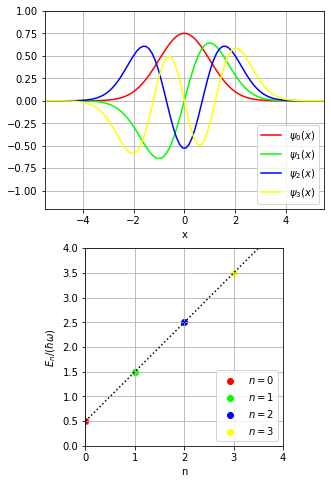

In [9]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (5,8))
               
x = np.linspace(-6, 6, 100)
axs[0].plot(x,psi_QHO_1D(x,0), color = 'r', label = '$\psi_0(x)$')
axs[0].plot(x,psi_QHO_1D(x,1), color = 'lime', label = '$\psi_1(x)$')
axs[0].plot(x,psi_QHO_1D(x,2), color = 'b', label = '$\psi_2(x)$')
axs[0].plot(x,psi_QHO_1D(x,3), color = 'yellow', label = '$\psi_3(x)$')
axs[0].set_xlim(-5.5, 5.5)
axs[0].set_ylim(-1.2, 1.)
axs[0].grid(True)
axs[0].set_xlabel('x')
axs[0].legend(loc = 'lower right')

n = np.linspace(0, 4, 100)
axs[1].plot(n, E_QHO_1D(n), ':k')
axs[1].scatter(0, E_QHO_1D(0), color = 'r', label = '$n = 0$')
axs[1].scatter(1, E_QHO_1D(1), color = 'lime', label = '$n = 1$')
axs[1].scatter(2, E_QHO_1D(2), color = 'b', label = '$n = 2$')
axs[1].scatter(3, E_QHO_1D(3), color = 'yellow', label = '$n = 3$')
axs[1].set_xlim(0, 4)
axs[1].set_ylim(0, 4)
axs[1].grid(True)
axs[1].set_xlabel('n')
axs[1].set_ylabel('$E_n/(\hbar\omega)$')
axs[1].set_aspect('equal')
axs[1].legend(loc = 'lower right')

plt.savefig('QHO_1D.png')

In [10]:
print('checando que as funções de onda estão normalizadas...')
display(Latex('$\int |\psi_0(x)|^2 dx =$ {}'.format(quad(psi_QHO_1D_module_squared, -100, 100, args = (0))[0])))
display(Latex('$\int |\psi_1(x)|^2 dx =$ {}'.format(quad(psi_QHO_1D_module_squared, -100, 100, args = (1))[0])))
display(Latex('$\int |\psi_2(x)|^2 dx =$ {}'.format(quad(psi_QHO_1D_module_squared, -100, 100, args = (2))[0])))
display(Latex('$\int |\psi_3(x)|^2 dx =$ {}'.format(quad(psi_QHO_1D_module_squared, -100, 100, args = (3))[0])))

checando que as funções de onda estão normalizadas...


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

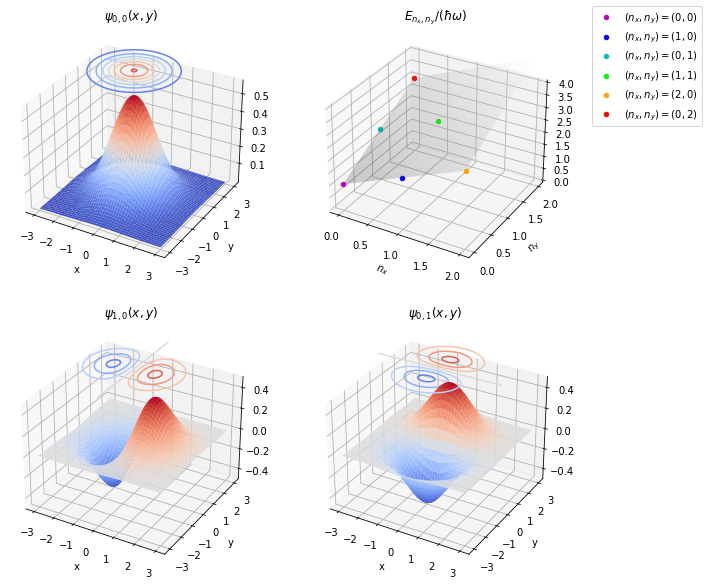

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), subplot_kw = {"projection": "3d"})

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = psi_QHO_2D(X, Y, 0, 0)
axs[0,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[0,0].contour(X, Y, Z, zdir = 'z', offset = .7, cmap = plt.cm.coolwarm)
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,0].set_title('$\psi_{0,0}(x,y)$')

nx = np.linspace(0, 2, 1000)
ny = np.linspace(0, 2, 1000)
nX, nY = np.meshgrid(nx, ny)
E = E_QHO_2D(nX, nY)
axs[0,1].plot_surface(nX, nY, E, cmap = cm.gray, alpha = 0.2)
axs[0,1].scatter(0, 0, E_QHO_2D(0, 0), color = 'm', label = '$(n_x,n_y) = (0,0)$')
axs[0,1].scatter(1, 0, E_QHO_2D(1, 0), color = 'b', label = '$(n_x,n_y) = (1,0)$')
axs[0,1].scatter(0, 1, E_QHO_2D(0, 1), color = 'c', label = '$(n_x,n_y) = (0,1)$')
axs[0,1].scatter(1, 1, E_QHO_2D(1, 1), color = 'lime', label = '$(n_x,n_y) = (1,1)$')
axs[0,1].scatter(2, 0, E_QHO_2D(2, 0), color = 'orange', label = '$(n_x,n_y) = (2,0)$')
axs[0,1].scatter(0, 2, E_QHO_2D(0, 2), color = 'r', label = '$(n_x,n_y) = (0,2)$')
axs[0,1].legend(bbox_to_anchor = (1.6, 1.1))
axs[0,1].set_zlim(0, 4)
axs[0,1].set_xlabel('$n_x$')
axs[0,1].set_ylabel('$n_y$')
axs[0,1].set_title('$E_{n_x,n_y}/(\hbar\omega)$')

X, Y = np.meshgrid(x, y)
Z = psi_QHO_2D(X, Y, 1, 0)
axs[1,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,0].contour(X, Y, Z, zdir = 'z', offset = .7, cmap = plt.cm.coolwarm)
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')
axs[1,0].set_title('$\psi_{1,0}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_QHO_2D(X, Y, 0, 1)
axs[1,1].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,1].contour(X, Y, Z, zdir = 'z', offset = .7, cmap = plt.cm.coolwarm)
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('y')
axs[1,1].set_title('$\psi_{0,1}(x,y)$')

plt.savefig('QHO_2D.png', bbox_inches = 'tight')

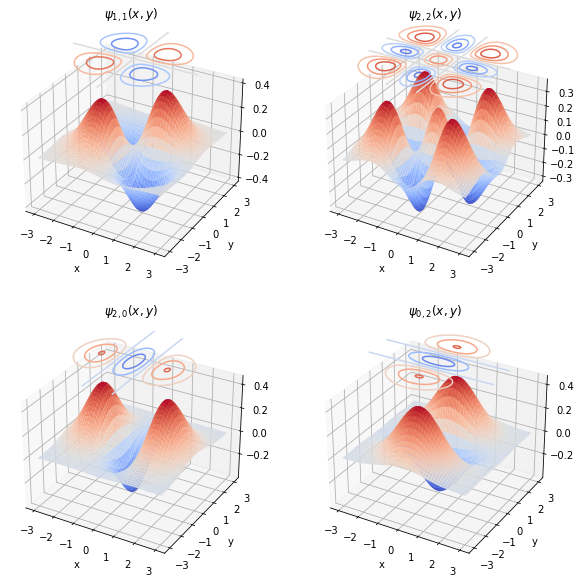

In [12]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), subplot_kw = {"projection": "3d"})

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = psi_QHO_2D(X, Y, 1, 1)
axs[0,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[0,0].contour(X, Y, Z, zdir = 'z', offset = .7, cmap = plt.cm.coolwarm)
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
axs[0,0].set_title('$\psi_{1,1}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_QHO_2D(X, Y, 2, 2)
axs[0,1].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[0,1].contour(X, Y, Z, zdir = 'z', offset = .6, cmap = plt.cm.coolwarm)
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('y')
axs[0,1].set_title('$\psi_{2,2}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_QHO_2D(X, Y, 2, 0)
axs[1,0].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,0].contour(X, Y, Z, zdir = 'z', offset = .7, cmap = plt.cm.coolwarm)
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')
axs[1,0].set_title('$\psi_{2,0}(x,y)$')

X, Y = np.meshgrid(x, y)
Z = psi_QHO_2D(X, Y, 0, 2)
axs[1,1].plot_surface(X, Y, Z, cmap = cm.coolwarm)
axs[1,1].contour(X, Y, Z, zdir = 'z', offset = .7, cmap = plt.cm.coolwarm)
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('y')
axs[1,1].set_title('$\psi_{0,2}(x,y)$')

plt.savefig('QHO_2Db.png', bbox_inches = 'tight')

In [13]:
print('checando que as funções de onda estão normalizadas...\n')
display(Latex('$\int_{-\infty}^\infty \int_{-\infty}^\infty |\psi_{0,0}(x,y)|^2 dx dy =$'), dblquad(psi_QHO_2D_module_squared, -100, 100, -100, 100, args = (0,0))[0])
print()
display(Latex('$\int_{-\infty}^\infty \int_{-\infty}^\infty |\psi_{1,0}(x,y)|^2 dx dy =$'), dblquad(psi_QHO_2D_module_squared, -100, 100, -100, 100, args = (1,0))[0])
print()
display(Latex('$\int_{-\infty}^\infty \int_{-\infty}^\infty |\psi_{0,1}(x,y)|^2 dx dy =$'), dblquad(psi_QHO_2D_module_squared, -100, 100, -100, 100, args = (0,1))[0])
print()
display(Latex('$\int_{-\infty}^\infty \int_{-\infty}^\infty |\psi_{1,1}(x,y)|^2 dx dy =$'), dblquad(psi_QHO_2D_module_squared, -100, 100, -100, 100, args = (1,1))[0])
print()
display(Latex('$\int_{-\infty}^\infty \int_{-\infty}^\infty |\psi_{2,0}(x,y)|^2 dx dy =$'), dblquad(psi_QHO_2D_module_squared, -100, 100, -100, 100, args = (2,0))[0])
print()
display(Latex('$\int_{-\infty}^\infty \int_{-\infty}^\infty |\psi_{0,2}(x,y)|^2 dx dy =$'), dblquad(psi_QHO_2D_module_squared, -100, 100, -100, 100, args = (0,2))[0])
print()
display(Latex('$\int_{-\infty}^\infty \int_{-\infty}^\infty |\psi_{2,2}(x,y)|^2 dx dy =$'), dblquad(psi_QHO_2D_module_squared, -100, 100, -100, 100, args = (2,2))[0])

checando que as funções de onda estão normalizadas...



<IPython.core.display.Latex object>

0.9999999999745984

<IPython.core.display.Latex object>

1.0000000001418876

<IPython.core.display.Latex object>

0.9999999998659166

<IPython.core.display.Latex object>

1.000000000360779

<IPython.core.display.Latex object>

1.0000000001636304

<IPython.core.display.Latex object>

0.9999999999573179

<IPython.core.display.Latex object>

1.000000000275069